# Quantum Generative Adversarial Networks

## Introduction

Generative adversarial networks (GANs) [[1]](https://arxiv.org/abs/1406.2661) have swiftly risen to prominence as one of the most widely-adopted methods for unsupervised learning, with showcased abilities in photo-realistic image generation. Given the success of classical GANs, the question of whether this success will translate into a quantum computing GAN has arisen. In this chapter, we explore the theory behind quantum generative adversarial networks (QGANs), as well as the practice of implementing one in Qiskit to learn a Gaussian distribution. Lastly, we end off with a discussion around the potential use cases of quantum generative adversarial networks and link relevant research for the very curious.

## Classical generative models

### Generative models

Until recently, the success of supervised learning models have completely overshadowed their generative counterparts. So much so, that the popularity of these supervised models might make it difficult to even conceptualize another approach to machine learning. 

The supervised approach, which feels intuitive to us by now, tries to make accurate predictions on new data, demonstrating that it has learned some underlying features of the dataset. Generative models are different. They learn to fabricate the data itself. It's the difference between telling apart cats and dogs, and generating completely new images of cats and dogs. The latter is a richer, but also more difficult task. 

Why? Adequately discriminating between given data can often be achieved through picking up on a few tell-tale features (like whiskers don't belong on eyes) which help form the strong decision boundaries in the high dimensional space. Consequently, machine learning researchers take great interest in generative models as these learning tasks seem to stab at a deeper notion of learning—trying to reproduce the underlying *creator* function. 

**So given a pool of training data, the goal of a generative model is to learn/reproduce the probability distribution that generated them.** A particularly eye-catching application of GANs is generating [high-resolution visuals](https://thispersondoesnotexist.com/) or [composing music](https://magenta.tensorflow.org/gansynth). Below is a generated image of a fake face. 

![An image of a cat, generated by a neural network](https://thiscatdoesnotexist.com)

<div class="alert alert-block alert-info"><b>Quiz question</b>
    What would be the most appropriate learning task for a generative model?<br>
A.  Classify incoming emails as spam or not <br>
B.  Predict stock prices<br>
C.  *Produce images of handwritten digits* <br>
D.  Recommending optimal movies </div>

##Generative adversarial networks

A particular class of generative models—generative adversarial networks (GANs)—have witnessed a boom in popularity since they were first proposed in 2014 by Goodfellow I., *et al.* [[1]](https://arxiv.org/abs/1406.2661). To understand the quantum analogue, we first briefly discuss the concept behind classical generative adversarial networks. 

Briefly put, GANs use a pair of neural networks pitted against each other—the generator and the discriminator. 

#### Generator
The generator's primary aim is to create fake data samples that are convincing enough for the discriminator to label them as real. With each training step, the generator improves at this, until it has near complete overlap  to the fixed distribution of real data. 

To allow the generator to explore a rich space of output non-deterministically, a random noise vector drawn from a <a href="https://towardsdatascience.com/understanding-latent-space-in-machine-learning-de5a7c687d8d">latent space</a>  is fed into the generator as input (usually sampled from a gaussian distribution). The generator succeeds once it learns to map most points in the latent space (gaussian noise) onto convincing fake data samples fitting the real distribution.

*At the start of training, the latent space is a meaningless n-dimensional gaussian distribution. But, as the generator evolves, the generator learns to map the noise vectors in the latent space to valid data in the objective dataset. At that point, we can view the latent space as a compressed representation encoding the real distribution of data—exclusively decoded by the generator neural network.*

#### Discriminator
The discriminator receives data samples from both the generator and the real distribution (not knowing which is which), and its' task is to correctly classify the input data samples as fake or real. 

Note how the discriminator's objective is directly opposed to its' counterpart. While the discriminator tries to minimize the probability of misclassifying the fake data as real, the generator tries to maximize it.

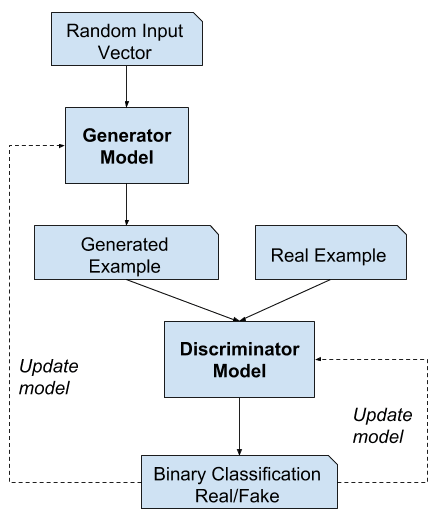

#### Convergence
The GAN finishes training once the generator consistently generates convincing data samples indistinguishable to the real data distribution leaving the discriminator unable to reasonably decipher between the two. Formally, this point is referred to as the Nash equilibrium (from game theory), at which the generator produces data that corresponds to the real probability distribution, and the discriminator resorts to guessing between fake or real (50% accuracy).

A common analogy between GANs and art theft brings the concept into frame. The generator is often seen as a fake artist trying to produce paintings identical to those found in the museum. The art expert's objective (discriminator) is to tell apart the generator's fake art from the real art.
Applied to this analogy, the discriminator assesses the paintings' authenticity while the generator creates the best fakes to fool it. The zero-sum game pushes the two networks to constantly one-up each other. Each improvement of the generator in creating convincing data, is bested by the discriminator's update in improved classification, and vice versa.

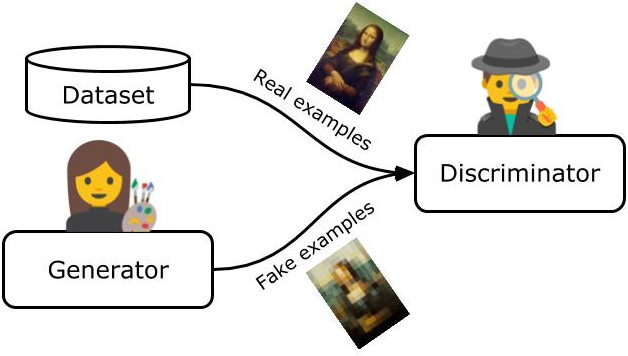

<div class="alert alert-block alert-info">
    <b>Quiz question:</b> Once the GAN reaches Nash Equilibrium...<br>
        A. *The discriminator randomly guesses fake/real with equal probability* <br>
        B. The generator returns to producing noise<br>
        C. The GAN reaches a common failure mode, and the training process must be restarted<br>
        D. The discriminator guesses that all samples are real
</div>

## Quantum Generative Adversarial Networks

In 2018, two companion papers (Ref. [[2]](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.98.012324), [[3]](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.121.040502)) brought the idea of GANs to the quantum domain. On a high level, quantum generative adversarial networks (QGANs) equip either the discriminator, the generator, or both with parameterized quantum circuits <b>[reference other txtbook chpt.]</b> with the goal of learning some quantum or classical data. In this chapter, we discuss the fully quantum version of QGANs (quantum data, quantum generator, quantum discriminator), keeping in mind that the broader principles apply across other types of QGANs.

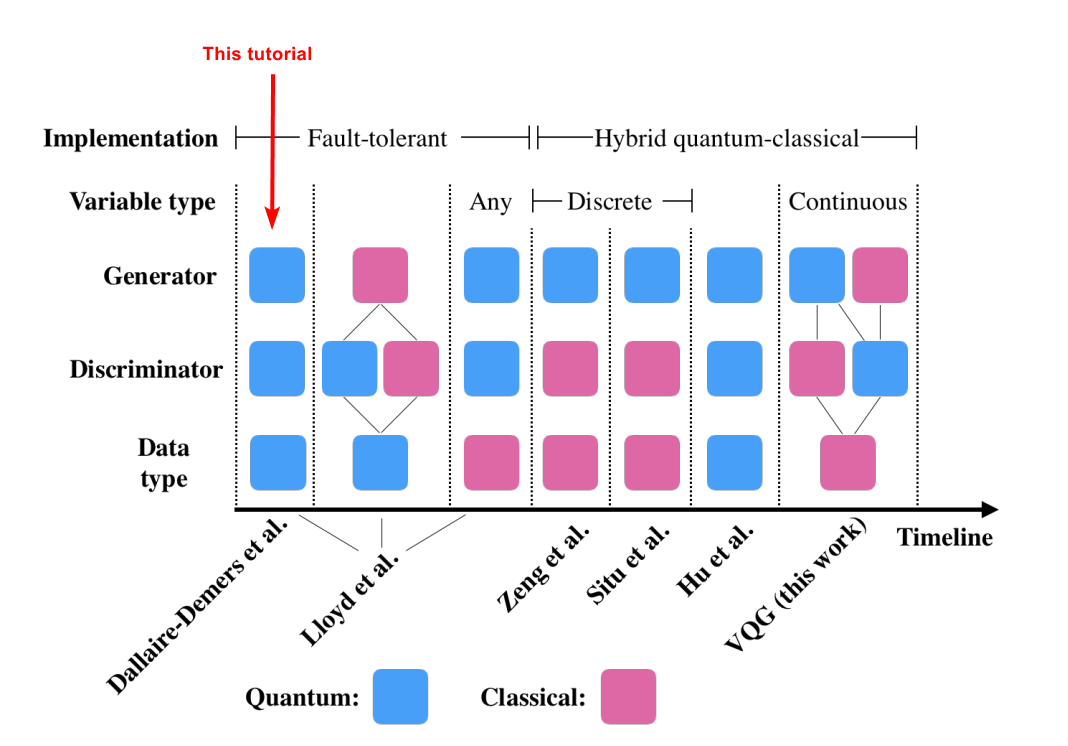

Image from Ref. <a href="https://arxiv.org/abs/1901.00848">[5]</a>

There are many analogous concepts, specifically with the adversarial training, between GANs and QGANs. Most importantly, the training structure of GANs largely persists to QGANs. We alternately train the generator & discriminator circuit parameters, while freezing the other's parameters. Through this, the quantum generator learns the real quantum state by proxy of the discriminator's signals, similar to GANs. It's proven that that the <a href="https://en.wikipedia.org/wiki/Nash_equilibrium">stable equilibrium</a> of the quantum adversarial game also occurs when the generator produces data identical to a real distribution [[3]](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.121.040502). 

The objective with a fully quantum QGAN is for the quantum generator to reproduce a desired state $|\psi\rangle$, using of course an adversarial training strategy. Similar to other variational quantum algorithms **[refer to relevant chpt.]**, the quantum generator moves towards this through an iterative update to its' parameters directed by a classical optimizer. However, in the case of a QGAN, the generator's cost function landscape itself evolves and becomes better as the discriminator improves at recognizing real samples. Let's look at the general circuit schematics of what we will be building.
</a>

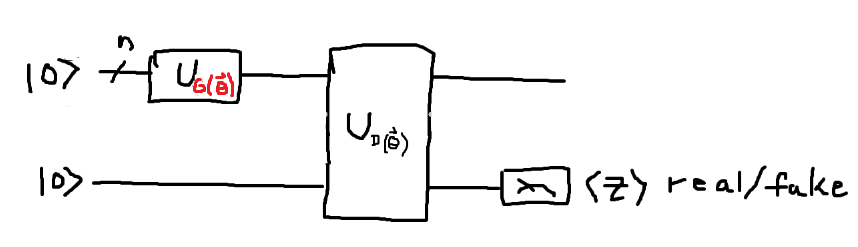

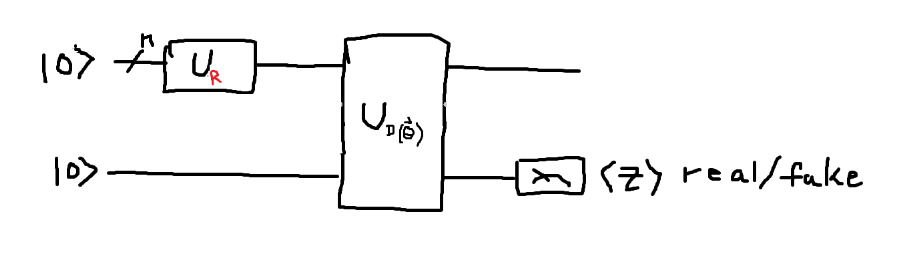

<div class="alert alert-warning"><em>It is worth noting that although we only consider one register each for both the generator and discriminator, one could also add an auxiliary "workspace" register to both the generator and discriminator. </em></div>

<div class="alert alert-info"><em><b>Widget: layers circuit. Internal ansatzes should be taken from below examples</b> + There's a small typo. The $U_{D(\vec{\theta})}$ should be $U_{D(\vec{\theta_D})}$</em></div>

We have two crucial circuits, both with an identical discriminator but different data sources. Let's break it down further. The discriminator uses the outputted state from each source and an initial state $|0\rangle$ defined on the final qubit to classify the input sample as $|real\rangle$ or $|fake\rangle$. For simplicity, we measure with respect to $\sigma^Z$ and hence arbitrarily define $|real\rangle = |1\rangle$ and $|fake\rangle = |0\rangle$ (the eigenbasis of $\sigma^Z$).

Looking at the first circuit diagram shows us how real data samples are fed into the discriminator. The real quantum data, characterized by $U_R$ applied on $|0\rangle^{\otimes n}$ is fed to the parameterized discriminator $U_{D(\vec{\theta_D})}$ (possibly containing an auxiliary register), and then measured to arrive at the discriminator's score on real data. It is worth noting that $U_{D(\vec{\theta_D})}$ contains several 2-qubit entangling gates to "transmit" relevant features of the real data to the discriminator's register (workspace). Formalized, the unitary evolution is, $U_{D(\vec{\theta_D})}U_R|0\rangle^{\otimes n+1}$, where $\vec{\theta_D}$ is the parameter vector that is updated through a classical optimizer to minimize the expectation value of the last qubit (equivalent to maximizing the probability of the discriminator classifying real data as $|real\rangle$).

In the second circuit, a generated wave function aimed to mimic the real one is fed into the discriminator. In other words, the fake quantum state $U_{G(\vec{\theta_G})}$, parameterized by $\vec{\theta_G}$, is applied on the initial state $|0^{\otimes n + 1}\rangle$, which is fed to the discriminator parameterized by $\vec{\theta_D}$. Taking the expectation value of the observable $I^{\otimes n}Z$ on $U_{G(\vec{\theta_G})}|0^{\otimes n + 1}\rangle$ gives us the discriminator's score on fake data. 

It is worth reiterating that $\langle fake | Z  |fake \rangle = 1$ meaning that if the discrminator "believes" a given sample to be wholly fake, the expectation value $\sigma^Z$ with repect to the last qubit will be equal to 1. It then follows naturally that the discriminator would want to correctly "assign" $|0\rangle$ to fake samples and $|1\rangle$ to real samples. The inverse is true for the generator. For it, the optimal scenario would be if the discriminator was completely convinced that its generated quantum state was real, thereby assigning it a $|1\rangle$. We can formalize these adversarial incentives into the following minimax decision rule (adapted from <a href="https://journals.aps.org/pra/abstract/10.1103/PhysRevA.98.012324">[2]</a>):

$\underset{\overrightarrow{\theta_G}}{\min}\underset{\overrightarrow{\theta_D}}{\max} 
\hspace{3pt} \Bigg(\text{Pr}\bigg(D(\overrightarrow{\theta_D}, R) = |\text{real}\rangle\bigg) +  \hspace{2pt} \text{Pr}\bigg(D(\overrightarrow{\theta_D}, G(\overrightarrow{\theta_G})) = |\text{fake}\rangle\bigg)\Bigg)$

<div class="alert alert-info">
    <b>Quiz question</b>: How do we obtain the probability of a given data sample being real, as assigned by the discriminator? Let $\langle Z \rangle$ be the expectation value of $\sigma^Z$ with respect to the last qubit. <em>Hint: the Z-expectation value is bounded between $[-1, 1]$</em><br>
    A. $\langle Z\rangle + 1$ <br>
    B. $\langle Z\rangle + 1/2 $ <br>
    C.  $ \frac{\langle Z \rangle + 1}{2}$ <<<< <br>
    D. $2^{\langle Z \rangle} $
</div>

<hr>

## Full implementation

### Learning a 2 qubit bell state

Equipped with the adequate theoretical foundation, we can now build an actual QGAN to learn the 2 qubit bell state through Qiskit! First, we import the standard libraries. 

In [2]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import *

### Real distribution

The 2 qubit bell state is a maximally entangled quantum state, the specific statevector we're interested to reproduce is

$|\psi\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) $.

Which can be constructed by applying a CNOT gate followed by a Hadamard.

In [3]:
REAL_DIST_NQUBITS = 2 # Number of qubits needed to model real distribution

real_circuit = QuantumCircuit(REAL_DIST_NQUBITS)
real_circuit.h(0)
real_circuit.cx(0, 1);

<div class="alert alert-info"><b>Widget: mini composer</b> Have them compose bell state of interest defined above. Stops when constructs properly</div>

### Variational quantum generator

We now define the generator ansatz. 

Given the primal nature of existing research into QGANs, the community has not yet settled into any optimal generator or discriminator ansatzes. On that note, most of the hyperparameters chosen in quantum machine learning are still driven by loose heuristics and there remains swaths left unexplored. 

But it is worth mentioning that whichever ansatz we choose for the generator, it must have enough capacity and be expressible enough to fully reproduce the real quantum state $|\psi\rangle$ defined earlier. So, although the ansatz used here is a little arbitrary, we are confident that it is plenty expressive for the bell state we are trying to model.

In [764]:
# Importing qiskit machine learning parameters
from qiskit.circuit import Parameter, ParameterVector

Here, we use the `TwoLocal` class to create an ansatz for the variational quantum generator with single qubit gates $RY$ and $RZ$, paired with the engtangling gate $CZ$.

In [424]:
from qiskit.circuit.library import TwoLocal
generator = TwoLocal(REAL_DIST_NQUBITS, 
                     ['ry', 'rz'], # Parameterized single qubit rotations
                     'cz',  # Entangling gate
                     'full', # Entanglement structure - all to all
                     reps=2, # Number of layers
                     parameter_prefix='θ_g', 
                     name='Generator')
generator = generator.decompose() # decompose into standard gates

generator.draw(output='mpl')

### Variational quantum discriminator

We now define the ansatz for the discriminator. In this case, instead of using <a href="https://qiskit.org/documentation/stubs/qiskit.circuit.library.TwoLocal.html#qiskit.circuit.library.TwoLocal">`TwoLocal`</a>, we create a custom ansatz with a <a href="https://qiskit.org/documentation/stubs/qiskit.circuit.ParameterVector.html">`ParameterVector`</a>.

In [426]:
disc_weights = ParameterVector('θ_d', 12)

discriminator = QuantumCircuit(3, name="Discriminator")
discriminator.barrier()
discriminator.h(0)
discriminator.rx(disc_weights[0], 0)
discriminator.ry(disc_weights[1], 0)
discriminator.rz(disc_weights[2], 0)

discriminator.rx(disc_weights[3], 1)
discriminator.ry(disc_weights[4], 1)
discriminator.rz(disc_weights[5], 1)

discriminator.rx(disc_weights[6], 2)
discriminator.ry(disc_weights[7], 2)
discriminator.rz(disc_weights[8], 2)
discriminator.cx(0, 2)
discriminator.cx(1, 2)
discriminator.rx(disc_weights[9], 2)
discriminator.ry(disc_weights[10], 2)
discriminator.rz(disc_weights[11], 2)

discriminator.draw(output='mpl')

### Compiling the QGAN

With all of our components in place, we now construct the two circuits forming the QGAN. The first feeds generated quantum state into the discriminator and the second is comprised of the discriminator applied on the real state. *It is easy to how this circuit fulfills the general [schematic](#schematic) we outlined earlier.*

In [452]:
N_GPARAMS = generator.num_parameters
N_DPARAMS = discriminator.num_parameters

gen_disc_circuit = QuantumCircuit(REAL_DIST_NQUBITS+1) # Extra qubit for the discriminator
gen_disc_circuit.compose(generator, inplace=True)
gen_disc_circuit.compose(discriminator, inplace=True)
gen_disc_circuit.draw(output='mpl')

A very natural question to ask at this point is: why isn't there any noise fed into the generator? As you may recall, in the classical GAN, the latent space was an essential ingredient. If there was no noise for the classical GAN, then it would be impossible for the generator to represent a complete distribution since with each update to its' parameters, it would be restricted to output one sample given its' deterministic nature. But consider, that in the quantum case, since we are feeding the whole "fake" wave function directly to the discriminator, the role that noise would play is much less obvious. With or without noise, the variational quantum generator is capable of directly modelling the wave function of interest, so long as the ansatz is of adequate capacity. 

With that said, there may still be benefits to equipping the variational quantum generator with a latent space of its own, in fact reference <a href="https://arxiv.org/abs/1901.00848">[5]</a> presents a method to allow the quantum generator to model continuous distributions using a latent space as input. But to keep it simple, we will still omit feeding noise into the varational quantum generator.

Below, we define the parameterized circuit linking the target distribution with the variational discriminator.

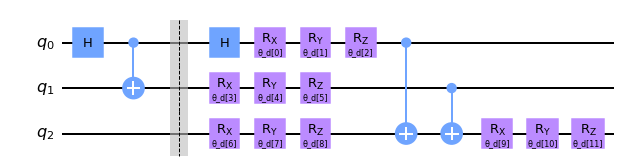

In [765]:
real_disc_circuit = QuantumCircuit(REAL_DIST_NQUBITS+1)
real_disc_circuit.compose(real_circuit, inplace=True)
real_disc_circuit.compose(discriminator, inplace=True)
real_disc_circuit.draw(output='mpl')

### Constructing cost

Recall the minimax decision rule we formulated earlier,

$\underset{\overrightarrow{\theta_G}}{\min}\underset{\overrightarrow{\theta_D}}{\max} 
\hspace{3pt} \Bigg(\text{Pr}\bigg(D(\overrightarrow{\theta_D}, R) = |\text{real}\rangle\bigg) +  \hspace{2pt} \text{Pr}\bigg(D(\overrightarrow{\theta_D}, G(\overrightarrow{\theta_G})) = |\text{fake}\rangle\bigg)\Bigg)$



Constructing a loss function for both the discriminator and generator is now trivial. Starting with the discriminator, we have 

$Cost_D = \text{Pr}\bigg(D(\overrightarrow{\theta_D}, G(\overrightarrow{\theta_G})) = |\text{real}\rangle\bigg) - \text{Pr}\bigg(D(\overrightarrow{\theta_D}, R) = |\text{real}\rangle\bigg)$.

Minimizing this entails maximizing the probability of correctly classifying real data while minimizing the probability of mistakenly classifying fake data.

As a hallmark of vanilla GANs, the generator’s cost function will simply be the negation of the discriminator’s cost, where the optimal strategy is to maximize the probability of the discriminator misclassifying fake data. We omit the term concerning the real quantum state since the generator's weights leave no effect on it.

$Cost_G =  - \text{Pr}\bigg(D(\overrightarrow{\theta_D}, G(\overrightarrow{\theta_G})) = |\text{real}\rangle\bigg)$

We now implement the above cost functions. It is worth noticing that after accessing the respective probabilities of each basis state, we arrive at the total probability of a given sample being classified as $|real\rangle = |1\rangle$ by summing over each basis state that satisfies $|XX1\rangle$. However, do note the reverse ordering given Qiskit's endian resulting in $|1XX\rangle$.

In [723]:
from qiskit.quantum_info import Statevector # To retrieve statevector of given circuit

def generator_cost(gen_params: tf.Tensor) -> float:    
    curr_params = np.append(disc_params.numpy(), gen_params.numpy()) # .numpy() method to extract numpy array from TF tensor
    state_probs = Statevector(gen_disc_circuit.bind_parameters(curr_params)).probabilities()
    prob_fake_true = np.sum(state_probs[0b100:])
    cost = -prob_fake_true 
    return cost

def discriminator_cost(disc_params: tf.Tensor) -> float:
    curr_params = np.append(disc_params.numpy(), gen_params.numpy()) # .numpy() method to extract numpy array from TF tensor
    gendisc_probs = Statevector(gen_disc_circuit.bind_parameters(curr_params)).probabilities()
    realdisc_probs = Statevector(real_disc_circuit.bind_parameters(disc_params.numpy())).probabilities()
    
    prob_fake_true = np.sum(gendisc_probs[0b100:])
    prob_real_true = np.sum(realdisc_probs[0b100:])

    cost = prob_fake_true - prob_real_true
    return cost

We now define a helper function to calculate the <a href="https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence">Kullback-Leibler divergence</a> between the model and target distribution. This is a common metric used to track the generator's progress while training since it effectively measures the distance between two distributions. A lower KL divergence indicates that the two distributions are similar, with a KL of 0 implying equivalence.  

In [778]:
atol = 1e-8
def calculate_KL(model_distribution: dict, target_distribution: dict) -> float:
    """Gauge model performance using Kullback Leibler Divergence"""
    KL = 0
    for bitstring, p_data in target_distribution.items():
        if np.isclose(p_data, 0, atol=atol):
            continue
        if bitstring in model_distribution.keys():
            KL += p_data * np.log(p_data) - p_data * np.log(model_distribution[bitstring])
        else:
            KL += p_data * np.log(p_data) - p_data * np.log(1e-6)
    return KL

### CircuitQNN

In the interest of brevity, we use the <a href="https://qiskit.org/documentation/machine-learning/stubs/qiskit_machine_learning.neural_networks.CircuitQNN.html">`CircuitQNN`</a> that compiles the parameterized circuit <b>[reference other txtbook chpt.]</b> and handles calculation of the gradient recipes. Calling the `forward()` method also directly outputs the probability state vectors of the circuit. 

In [780]:
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.neural_networks import CircuitQNN

# define quantum instances (statevector and sample based)
qi_sv = QuantumInstance(Aer.get_backend('aer_simulator_statevector'))

# specify QNN to update generator weights
gen_qnn = CircuitQNN(gen_disc_circuit,  # parameterized circuit
                     gen_disc_circuit.parameters[:N_DPARAMS], # frozen input arguements (discriminator weights)
                     gen_disc_circuit.parameters[N_DPARAMS:], # differentiable weights (generator weights)
                     sparse=True, # returns sparse probability vector
                     quantum_instance=qi_sv)

# specify QNNs to update discriminator weights
disc_fake_qnn = CircuitQNN(gen_disc_circuit, # parameterized circuit
                           gen_disc_circuit.parameters[N_DPARAMS:], # frozen input arguements (generator weights)
                           gen_disc_circuit.parameters[:N_DPARAMS], # differentiable weights (discriminator weights)
                           sparse=True, # returns sparse probability vector
                           quantum_instance=qi_sv)
disc_real_qnn = CircuitQNN(real_disc_circuit, # parameterized circuit
                           [], # no input parameters
                           gen_disc_circuit.parameters[:N_DPARAMS], # differentiable weights (discriminator weights)
                           sparse=True, # returns sparse probability vector
                           quantum_instance=qi_sv)

Here, we use TensorFlow Keras to create an ADAM optimizer instance for both the generator and the discriminator. The ADAM optimizer is a widely-used optimizer in classical machine learning that uses momentum-based gradient updates. It is known to far outperform vanilla gradient descent. 

Using the Keras optimizer requires that we store the weights as TF variables, which can be easily done through the `tf.Variable` method. Converting back into a `np.ndarray` is done by calling the `.numpy()` instance method on the `tf.Variable`.

In [803]:
import tensorflow as tf
import pickle # to serialize and deserialize variables

# Initialize parameters
init_gen_params = np.random.uniform(low=-np.pi, high=np.pi, size=(N_GPARAMS,))
init_disc_params = np.random.uniform(low=-np.pi, high=np.pi, size=(N_DPARAMS,))
gen_params = tf.Variable(init_gen_params)
disc_params = tf.Variable(init_disc_params)

Let's look at our starting point for the generator created from  random weights. 

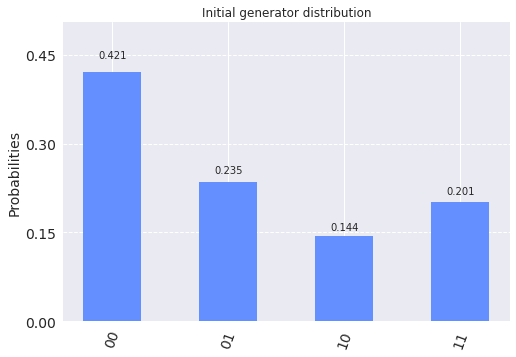

In [805]:
init_gen_circuit = generator.bind_parameters(init_gen_params)
init_prob_dict = Statevector(init_gen_circuit).probabilities_dict()
with plt.style.context('seaborn'):
    fig, ax1 = plt.subplots(1, 1, sharey=True)
    ax1.set_title("Initial generator distribution")
    plot_histogram(init_prob_dict, ax=ax1)

In [806]:
# Initialize Adam optimizer from Keras
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)

### Training

In [807]:
# Initialize variables to track metrics while training 
best_gen_params = tf.Variable(init_gen_params)
gloss = []
dloss = []
kl_div = []

It is important to notice a few things about the following training logic. 
1. The discriminator's weights are updated fivefold for each generator update. When dealing with classical GANs, it's also not uncommon to see an unbalanced number of training steps between the two networks. In this case, we arrive at a 5:1 ratio as a best practice through trial and error.
2. The `backward()` method of `CircuitQNN` returns the gradients with respect to each weight for each basis state for each batch. In other words, the return shape of `CircuitQNN.backward(...)[1].todense()` is `(num_batches, num_basis_states, num_weights)`. So to arrive at the gradient for $Cost_D$, we first sum over all the gradients for each basis state satisfying $|1XX\rangle$, and then subtract them according to the $Cost_D$ function. Recall that the linearity the derivative allows us to distribute it as implemented below.
3. Due to the instability of GAN training, we store the best generator parameters.

In [808]:
for epoch in range(100):
    """Quantum discriminator parameter updates"""
    d_steps = 5 # N discriminator updates per generator update
    for disc_train_step in range(d_steps):
        # Partial derivatives wrt θ_D  
        d_fake = disc_fake_qnn.backward(gen_params, disc_params)[1].todense()[0, 0b100:]
        d_fake = np.sum(d_fake, axis=0)
        d_real = disc_real_qnn.backward([], disc_params)[1].todense()[0, 0b100:]
        d_real = np.sum(d_real, axis=0)
        
        grad_dcost = [d_fake[i] - d_real[i] for i in range(N_DPARAMS)] # Recall Cost_D structure
        grad_dcost = tf.convert_to_tensor(grad_dcost) 
        
        discriminator_optimizer.apply_gradients(zip([grad_dcost], [disc_params])) # Update disc params with gradient
        
        # Track discriminator loss
        if disc_train_step % d_steps == 0:
            dloss.append(discriminator_cost(disc_params))
    
    """Quantum generator parameter updates"""
    for gen_train_step in range(1):
        # Compute partial derivatives of prob(fake|true) wrt each generator weight
        grads = gen_qnn.backward(disc_params, gen_params)
        grads = grads[1].todense()[0][0b100:] 
        grads = -np.sum(grads, axis=0) # Recall Cost_G structure and the linearity of the derivative operation
        grads = tf.convert_to_tensor(grads)
        
        generator_optimizer.apply_gradients(zip([grads], [gen_params])) # Update gen params with gradient
        gloss.append(generator_cost(gen_params))
    
    """Tracking KL and saving best performing generator weights"""
    gen_checkpoint_circuit = fake_test.bind_parameters(gen_params.numpy()) # Create test circuit with updated gen parameters
    gen_prob_dict = Statevector(gen_checkpoint_circuit).probabilities_dict() # Retrieve probability distribution of current generator
    real_prob_dict = Statevector(real_test).probabilities_dict() # Constant real probability distribution
    
    current_kl = calculate_KL(gen_prob_dict, real_prob_dict)
    kl_div.append(current_kl)
    
    if np.min(kl_div) == current_kl: 
        # New best
        best_gen_params = pickle.loads(pickle.dumps(gen_params)) # serialize+deserialize to simply ensure zero links
    print("Epoch %.0f : \t Generator cost: %.3f \t Discriminator cost: %.3f \t KL Div: %.3f " % (epoch+1, gloss[-1], dloss[-1], kl_div[-1]))

Epoch 1 : 	 Generator cost: -0.566 	 Discriminator cost: 0.093 	 KL Div: 0.570 
Epoch 2 : 	 Generator cost: -0.629 	 Discriminator cost: 0.036 	 KL Div: 0.598 
Epoch 3 : 	 Generator cost: -0.670 	 Discriminator cost: -0.001 	 KL Div: 0.628 
Epoch 4 : 	 Generator cost: -0.663 	 Discriminator cost: -0.020 	 KL Div: 0.660 
Epoch 5 : 	 Generator cost: -0.603 	 Discriminator cost: -0.048 	 KL Div: 0.696 
Epoch 6 : 	 Generator cost: -0.508 	 Discriminator cost: -0.100 	 KL Div: 0.735 
Epoch 7 : 	 Generator cost: -0.395 	 Discriminator cost: -0.180 	 KL Div: 0.773 
Epoch 8 : 	 Generator cost: -0.282 	 Discriminator cost: -0.299 	 KL Div: 0.810 
Epoch 9 : 	 Generator cost: -0.197 	 Discriminator cost: -0.454 	 KL Div: 0.846 
Epoch 10 : 	 Generator cost: -0.167 	 Discriminator cost: -0.609 	 KL Div: 0.884 
Epoch 11 : 	 Generator cost: -0.185 	 Discriminator cost: -0.704 	 KL Div: 0.923 
Epoch 12 : 	 Generator cost: -0.207 	 Discriminator cost: -0.730 	 KL Div: 0.965 
Epoch 13 : 	 Generator cost

### Results

We plot the collected metrics to examine how the QGAN learned.

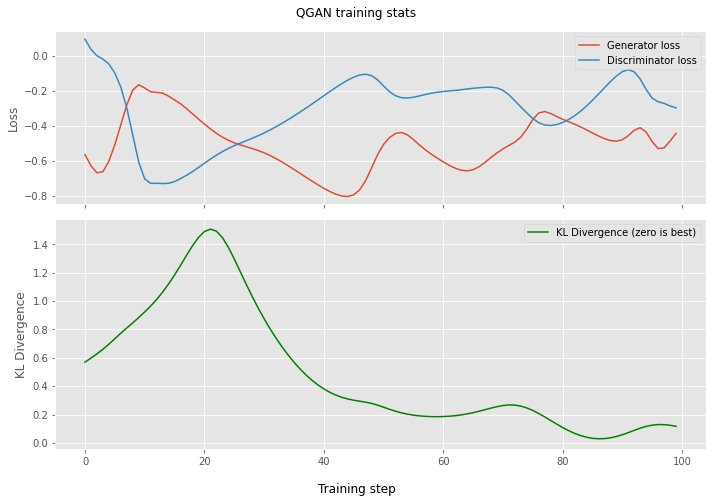

In [809]:
import matplotlib.pyplot as plt
with plt.style.context('ggplot'):
    fig, (loss, kl) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [0.75, 1]}, figsize=(10,7))
    fig.suptitle('QGAN training stats')
    fig.supxlabel('Training step')
    loss.plot(range(len(gloss)), gloss, label="Generator loss")
    loss.plot(range(len(dloss)), dloss, label="Discriminator loss")
    loss.legend()
    loss.set(ylabel='Loss')

    kl.plot(range(len(kl_div)), kl_div, label="KL Divergence (zero is best)", color="g")
    kl.set(ylabel='KL Divergence')
    kl.legend()
    fig.tight_layout();

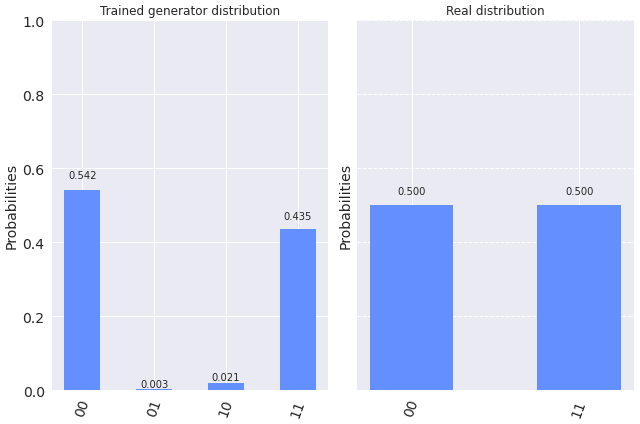

In [810]:
gen_checkpoint_circuit = generator.bind_parameters(best_gen_params.numpy()) # Create test circuit with new parameters
gen_prob_dict = Statevector(gen_checkpoint_circuit).probabilities_dict()
real_prob_dict = Statevector(real_circuit).probabilities_dict() # constant 

with plt.style.context('seaborn'):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(9,6))
    plot_histogram(gen_prob_dict, ax=ax1)
    ax1.set_title("Trained generator distribution")
    plot_histogram(real_prob_dict, ax=ax2)
    ax2.set_title("Real distribution")
    ax2.set_ylim([0,1])

    fig.tight_layout()

With just 100 epochs, we see that the generator has approximated the bell state $|\psi\rangle$ quite well. 

Note that reproducing results from above may take a few runs. Due to the fragile nature of training two competing models at once, generative adversarial networks as a whole are notorious for failing to converge—and it is only amplified for QGANs given the lack of best practices. GANs (QGANs inclusive) often suffer from vanishing gradients, often caused by a discriminator that is too good. 

Another drawback of the adversarial training structure—albeit less prevalant with fully quantum QGANs—is mode collapse, the failure mode of GANs when the generator and discriminator get caught in a cat and mouse chase. The generator spams a certain sample that has a tendency to fool the discriminator, to which the discriminator adapts to over time, but the generator swiftly follows up yet again with another sample. <a href="https://developers.google.com/machine-learning/gan/problems">Learn more on remedies</a> to GAN failure modes.

### Learning a normal distribution with OpFlowQNN

The following section builds a QGAN to learn a 3 qubit normal distribution, while changing a few previous methods along the way. 
1. Learning a more complex distribution
2. Using OpFlowQNN to retrieve expectation values directly
3. Amelgomating the discriminator output qubit to the generator's register

Here we define the real distribution using the `qiskit_finance` module and the generator ansatz that'll be used to model the Gaussian.

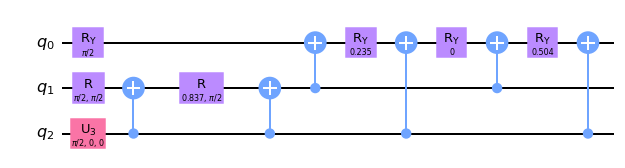

In [841]:
from qiskit_finance.circuit.library import NormalDistribution

REAL_DIST_NQUBITS = 3

real_circuit = NormalDistribution(REAL_DIST_NQUBITS, mu=0, sigma=0.15)
real_circuit = real_circuit.decompose().decompose().decompose()
real_circuit.draw(output='mpl')

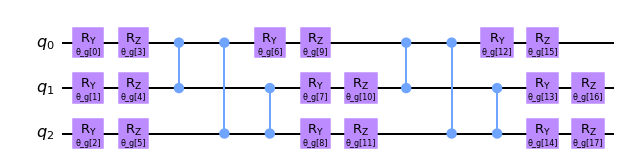

In [842]:
generator = TwoLocal(REAL_DIST_NQUBITS, 
                     ['ry', 'rz'], # Parameterized single qubit rotations
                     'cz',  # Entangling gate
                     'full', # Entanglement structure - all to all
                     reps=2, # Number of layers
                     parameter_prefix='θ_g', 
                     name='Generator')
generator = generator.decompose()
generator.draw(output='mpl')

Now, we define a similar ansatz as before for the discriminator, just with the output qubit defined on `q2` instead of `q3` as one might have expected from the previous example. It's important to note that the qubit used to measure $\langle Z\rangle_{out}$ is largely irrelevant since the discriminator ansatz can universally transform any given quantum state to a desired one. Previously, we defined the output qubit to be one a separate register to make it more intuitive but there exists no true justification with respect to QGAN performance.

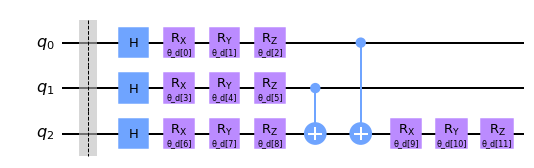

In [843]:
disc_weights = ParameterVector('θ_d', 12)
discriminator = QuantumCircuit(REAL_DIST_WIDTH, name="Discriminator")
discriminator.barrier()
discriminator.h(0)
discriminator.rx(disc_weights[0], 0)
discriminator.ry(disc_weights[1], 0)
discriminator.rz(disc_weights[2], 0)

discriminator.h(1)
discriminator.rx(disc_weights[3], 1)
discriminator.ry(disc_weights[4], 1)
discriminator.rz(disc_weights[5], 1)

discriminator.h(2)
discriminator.rx(disc_weights[6], 2)
discriminator.ry(disc_weights[7], 2)
discriminator.rz(disc_weights[8], 2)
discriminator.cx(1,2)
discriminator.cx(0,2)
discriminator.rx(disc_weights[9], 2)
discriminator.ry(disc_weights[10], 2)
discriminator.rz(disc_weights[11], 2)
discriminator.draw(output='mpl')

Then we construct the complete circuits.

In [844]:
N_GPARAMS = generator.num_parameters
N_DPARAMS = discriminator.num_parameters

gen_disc_circuit = QuantumCircuit(REAL_DIST_NQUBITS)
gen_disc_circuit.compose(generator, inplace=True)
gen_disc_circuit.compose(discriminator, inplace=True)

gen_disc_circuit.draw(output='mpl')

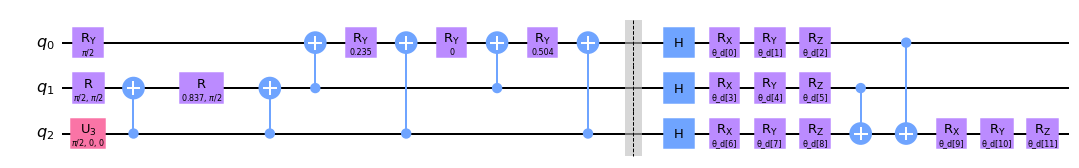

In [847]:
real_disc_circuit = QuantumCircuit(REAL_DIST_NQUBITS)
real_disc_circuit.compose(real_circuit, inplace=True)
real_disc_circuit.compose(discriminator, inplace=True)
real_disc_circuit.draw(output='mpl')

We employ the <a href="https://qiskit.org/documentation/machine-learning/stubs/qiskit_machine_learning.neural_networks.OpflowQNN.html">`OpflowQNN`</a> from Qiskit which takes a (parametrized) operator and leverages Qiskit's gradient framework to complete the backward passes. The operator defined here is equivalent to the expectation value of $\sigma^Z$ with respect to the last qubit.

In [848]:
from qiskit.providers.aer import QasmSimulator
from qiskit.opflow import StateFn, PauliSumOp, ListOp, Gradient, AerPauliExpectation
from qiskit_machine_learning.neural_networks import OpflowQNN

# set method to calculcate expected values
expval = AerPauliExpectation()

# define gradient method
gradient = Gradient()

# define quantum instances (statevector)
qi_sv = QuantumInstance(Aer.get_backend('aer_simulator_statevector'))

# Circuit wave function
gen_disc_sfn = StateFn(gen_disc_circuit)
real_disc_sfn = StateFn(real_disc_circuit)

# construct operator to retrieve Pauli Z expval of the last qubit
H1 = StateFn(PauliSumOp.from_list([('ZII', 1.0)]))

# combine operator and circuit to objective function
gendisc_op = ~H1 @ gen_disc_sfn
realdisc_op = ~H1  @ real_disc_sfn
print(gendisc_op)
print(realdisc_op)

ComposedOp([
  OperatorMeasurement(1.0 * ZII),
  CircuitStateFn(
       ┌────────────┐┌────────────┐      ┌────────────┐┌────────────┐»
  q_0: ┤ Ry(θ_g[0]) ├┤ Rz(θ_g[3]) ├─■──■─┤ Ry(θ_g[6]) ├┤ Rz(θ_g[9]) ├»
       ├────────────┤├────────────┤ │  │ └────────────┘├────────────┤»
  q_1: ┤ Ry(θ_g[1]) ├┤ Rz(θ_g[4]) ├─■──┼───────■───────┤ Ry(θ_g[7]) ├»
       ├────────────┤├────────────┤    │       │       ├────────────┤»
  q_2: ┤ Ry(θ_g[2]) ├┤ Rz(θ_g[5]) ├────■───────■───────┤ Ry(θ_g[8]) ├»
       └────────────┘└────────────┘                    └────────────┘»
  «                          ┌─────────────┐┌─────────────┐                ░ »
  «q_0: ────────────────■──■─┤ Ry(θ_g[12]) ├┤ Rz(θ_g[15]) ├────────────────░─»
  «     ┌─────────────┐ │  │ └─────────────┘├─────────────┤┌─────────────┐ ░ »
  «q_1: ┤ Rz(θ_g[10]) ├─■──┼────────■───────┤ Ry(θ_g[13]) ├┤ Rz(θ_g[16]) ├─░─»
  «     ├─────────────┤    │        │       ├─────────────┤├─────────────┤ ░ »
  «q_2: ┤ Rz(θ_g[11]) ├────■────────■──────

In [854]:
# construct OpflowQNN with the two operators, the input parameters, the weight parameters, 
# the expected value, and quantum instance.
"""|fake> => |0> => 1 ; |real> => |1> => -1"""
gen_opqnn = OpflowQNN(gendisc_op,
                      gen_disc_circuit.parameters[:N_DPARAMS], # input parameters (discriminator weights)
                      gen_disc_circuit.parameters[N_DPARAMS:], # differentiable weights (generator weights)
                      expval, 
                      gradient, 
                      qi_sv) # gen wants to to minimize this expval 

disc_fake_opqnn = OpflowQNN(gendisc_op, 
                            gen_disc_circuit.parameters[N_DPARAMS:], # input parameters (generator weights)
                            gen_disc_circuit.parameters[:N_DPARAMS], # differentiable weights (discriminator weights)
                            expval, 
                            gradient, 
                            qi_sv) # disc wants to maximize this expval

disc_real_opqnn = OpflowQNN(realdisc_op, 
                            [], 
                            gen_disc_circuit.parameters[:N_DPARAMS], # differentiable weights (discriminator weights)
                            expval, 
                            gradient, 
                            qi_sv) # disc wants to minimize this expval

First we initialize the training parameters and define the optimizer

In [861]:
### START
init_gen_params = tf.Variable(np.random.uniform(low=-np.pi, high=np.pi, size=(N_GPARAMS,)))
init_disc_params = tf.Variable(np.random.uniform(low=-np.pi, high=np.pi, size=(N_DPARAMS,)))
gen_params = init_gen_params
disc_params = init_disc_params

generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.02)

Now we construct the training logic. There are a few key differences to the cost function here that impacts the gradient rule. Since a forward pass now returns the direct expectation value and not a probability statevector, it's important to remind ourselves that $\langle \text{real} |Z| \text{real} \rangle = -1$ and $\langle \text{fake} |Z|\text{fake}\rangle = 1$. 

Applying similar logic to before, we arrive at the intuition that the discriminator would want to maximize $\langle \text{fake} |Z|\text{fake}\rangle $ when fed fake data and minimize $\langle \text{real} |Z|\text{real}\rangle$ when receiving the real quantum state. In contrast to that, the generator wishes to minimize $\langle \text{fake} |Z|\text{fake}\rangle $, which is akin to the maximizing the probability of the discriminator classifying fake samples as $|\text{real}\rangle = |1\rangle$

We now cement these ideas into the following minimax decision rule defined by the proper expectation values. Let $\rho^{DR}$ and $\rho^{GR}$ be the density matrix representations of  $\bigg(U_{D(\vec{\theta_D})}U_R|0\rangle^{\otimes n+1}\bigg)$ and $\bigg(U_{D(\vec{\theta_D})} U_{G(\vec{\theta_G})}|0\rangle^{\otimes n+1}\bigg)$, respectively. Also recall that the expectation value of $\sigma^P$ with respect to an arbitrary density matrix $\rho$ is defined as $\text{tr}(\rho \sigma^P)$ (relevant [chapter](https://qiskit.org/textbook/ch-quantum-hardware/density-matrix.html)). While remembering the linearity of the trace operation, we arrive at 

$\underset{\vec{\theta_G}}{\min} \hspace{2pt} \underset{\vec{\theta_D}}{\max} \hspace{3pt} \text{tr}\bigg(\big(\rho^{DG}(\vec{\theta_D}, \vec{\theta_G}) - \rho^{DR}(\vec{\theta_D})\Big) Z\bigg)$ 

Which leads us to the following cost functions (optimum is minimum),

$Cost_D(\vec{\theta_D},  \vec{\theta_G}) =  \text{tr}\bigg(Z\rho^{DR}(\vec{\theta_D}) \bigg) - \text{tr}\bigg(Z\rho^{DG}(\vec{\theta_D}, \vec{\theta_G})\bigg)$

$Cost_G(\vec{\theta_D},  \vec{\theta_G}) = \text{tr}\bigg(Z \rho^{DG}(\vec{\theta_D}, \vec{\theta_G}) \bigg)$

Meaning that the gradients are,

$\nabla_{\vec{\theta_D}}\; Cost_D(\vec{\theta_D},  \vec{\theta_G}) =  \nabla_{\vec{\theta_D}}\; \text{tr}\bigg(Z\rho^{DR}(\vec{\theta_D}) \bigg) - \nabla_{\vec{\theta_D}} \;\text{tr}\bigg(Z\rho^{DG}(\vec{\theta_D}, \vec{\theta_G})\bigg)$

$\nabla_{\vec{\theta_G}} \; Cost_G(\vec{\theta_D},  \vec{\theta_G}) = \nabla_{\vec{\theta_G}}\; \text{tr}\bigg(Z \rho^{DG}(\vec{\theta_D}, \vec{\theta_G}) \bigg)$

and we're complete! We now have all the information needed to implement it since the `OpFlowQNN.backward()` method computes the constituent gradients for us. Let's implement this.

*Keep in mind that the above formulations rely upon our initial definition that $|\text{real}\rangle = |1\rangle$ and $|\text{fake}\rangle = |0\rangle$.*

In [863]:
best_gen_params = init_gen_params
gloss = []
dloss = []
kl_div = []

for epoch in range(300):
    d_steps = 5
    """Quantum discriminator parameter update"""
    for disc_train_step in range(d_steps):
        grad_dcost_fake = disc_fake_opqnn.backward(gen_params, disc_params)[1][0,0]
        grad_dcost_real = disc_real_opqnn.backward([], disc_params)[1][0,0]
        grad_dcost = grad_dcost_real - grad_dcost_fake # as formulated above  
        grad_dcost = tf.convert_to_tensor(grad_dcost)
        
        discriminator_optimizer.apply_gradients(zip([grad_dcost], [disc_params])) # update disc_params
        
        if disc_train_step % d_steps == 0:
            dloss.append(discriminator_cost(disc_params))
    
    """Quantum generator parameter update"""
    for gen_train_step in range(1):
        grad_gcost = gen_opqnn.backward(disc_params, gen_params)[1][0,0] # as formulated above  
        grad_gcost = tf.convert_to_tensor(grad_gcost)      
        
        generator_optimizer.apply_gradients(zip([grad_gcost], [gen_params])) # update gen_params
        gloss.append(generator_cost(gen_params))

    """Tracking KL and saving best performing generator weights"""
    gen_checkpoint_circuit = fake_test.bind_parameters(gen_params.numpy()) # Create test circuit with updated gen parameters
    gen_prob_dict = Statevector(gen_checkpoint_circuit).probabilities_dict() # Retrieve probability distribution of current generator
    real_prob_dict = Statevector(real_test).probabilities_dict() # Constant real probability distribution
    
    current_kl = calculate_KL(gen_prob_dict, real_prob_dict)
    kl_div.append(current_kl)
    if np.min(kl_div) == current_kl: 
        # Store new best generator weights and flag print statement
        best_gen_params = pickle.loads(pickle.dumps(gen_params)) # serialize+deserialize to just zero links
        print("Epoch %.0f : \t Generator cost: %.3f \t Discriminator cost: %.3f \t KL Div: %.3f 🚩" % (epoch+1, gloss[-1], dloss[-1], kl_div[-1]))
    else:
        print("Epoch %.0f : \t Generator cost: %.3f \t Discriminator cost: %.3f \t KL Div: %.3f " % (epoch+1, gloss[-1], dloss[-1], kl_div[-1]))

import matplotlib.pyplot as plt
with plt.style.context('ggplot'):
    fig, (loss, kl) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [0.75, 1]}, figsize=(10,7))
    fig.suptitle('QGAN training stats')
    fig.supxlabel('Training step')
    loss.plot(range(len(gloss)), gloss, label="Generator loss")
    loss.plot(range(len(dloss)), dloss, label="Discriminator loss")
    loss.legend()
    loss.set(ylabel='Loss')

    kl.plot(range(len(kl_div)), kl_div, label="KL Divergence (zero is best)", color="g")
    kl.set(ylabel='KL Divergence')
    kl.legend()
    fig.tight_layout();

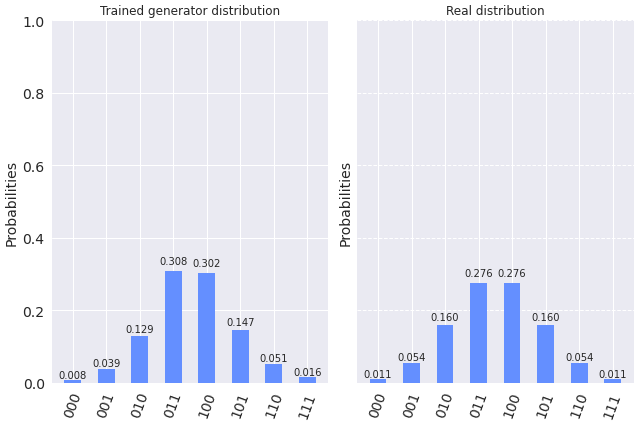

In [866]:
gen_checkpoint_circuit = generator.bind_parameters(best_gen_params.numpy()) # Create test circuit with new parameters
gen_prob_dict = Statevector(gen_checkpoint_circuit).probabilities_dict()
real_prob_dict = Statevector(real_circuit).probabilities_dict() # constant 

with plt.style.context('seaborn'):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(9,6))
    plot_histogram(gen_prob_dict, ax=ax1)
    ax1.set_title("Trained generator distribution")
    plot_histogram(real_prob_dict, ax=ax2)
    ax2.set_title("Real distribution")
    ax2.set_ylim([0,1])

    fig.tight_layout()

Impressive!

<div class="alert alert-info">
    <b>WIDGET: Drag and drop pseudocode for training sequence. Proper order: </b> <br>
    <ol>
        <li>For n:=0 to N_EPOCHS <b>do</b> 
            <ol>
                <li>
                    For d:=0 to num_disc_steps <b>do</b> 
                    <ol>
                        <li> Compute $\sigma^Z$ expectation value of d_out qubit when fed fake and real data</li>
                        <li> Update $\vec{\theta_D}$ according to $\nabla_{\vec{\theta_D}}\; Cost_D(\vec{\theta_D},  \vec{\theta_G})$ using ADAM optimizer</li>
                    </ol>
                </li>
                <li>
                    For g:=0 to num_gen_steps <b>do</b> 
                    <ol>
                        <li> Compute $\sigma^Z$ expectation value of d_out qubit when fed fake data</li>
                        <li> Update $\vec{\theta_G}$ according to $\nabla_{\vec{\theta_G}}\; Cost_G(\vec{\theta_D},  \vec{\theta_G})$ using ADAM optimizer</li>
                    </ol>
                </li>
                <li>
                    Compute KL divergence between G and R
                </li>
                <li>
                    If current KL divergence is the lowest yet <b>do</b> 
                    <ol>
                        <li>
                            Save current generator weights
                        </li>
                    </ol>
                </li>
            </ol>
        </li>
    </ol>
</div>

## Potential applications

The development of QGANs is still emerging, so there remains much more research to be done on potential applications. However, there is hope that QGANs will enable sampling and manipulation of classically intractable probability distributions (difficult to sample from classically).

As demonstrated in <a href="https://arxiv.org/abs/1904.00043">[4]</a>, QGANs show promise in being used to load a classical distribution onto a quantum circuit for further quantum processing. 

In quantum chemistry, quantum computers are believed to have an intrinsic advantage in being able to represent and manipulate correlated fermionic states (molecules). A natural question one could ask is: given an adequate ansatz, could QGANs be used to generate new types of molecules that fit the mould of an inputted set of materials/molecules possibly obtained through VQE? That would involve extending QGANs into the conditional realm (inputting a conditional label to both the generator and discriminator, see <a href="https://arxiv.org/abs/1411.1784">conditional GANs</a>) but as of now, it remains an open question.

## For the enthusiasts

To extend the ideas you've just learned, create a QGAN to learn a 3 qubit normal distribution but with a classical discriminator. Reference <a href="https://arxiv.org/abs/1904.00043">[4]</a> will be helpful. You may use the same generator ansatz we've used above, but ensure the discriminator's neural network is adequately sized to match the quantum generator's power. 

## References

1. I. J. Goodfellow, J. Pouget-Abadie, M. Mirza, B. Xu, D.Warde-Farley, S. Ozair, A. Courville, and Y. Bengio, in *Proceedings of the 27th International Conference on Neural Information Processing Systems* (MIT Press, Cambridge, MA, 2014), Vol. 2, pp. 2672–2680, [arXiv:1406.2661](https://arxiv.org/abs/1406.2661).
2. P.-L. Dallaire-Demers, & N. Killoran, *Quantum generative adversarial networks,* Phys. Rev. A 98, 012324 (2018), [doi.org:10.1103/PhysRevA.98.012324](https://doi.org/10.1103/PhysRevA.98.012324), [arXiv:1804.08641](https://arxiv.org/abs/1804.08641)
3. S. Lloyd, & C. Weedbrook, *Quantum generative adversarial learning*. Phys. Rev. Lett. 121, 040502 (2018), [doi.org:10.1103/PhysRevLett.121.040502](https://doi.org/10.1103/PhysRevLett.121.040502), [arXiv:1804.09139](https://arxiv.org/abs/1804.09139)
4. C. Zoufal, A. Lucchi, and S. Woerner, *Quantum generative adversarial networks for learning and loading random distributions,* npj Quantum Information, 5, Article number: 103 (2019), [doi.org/10.1038/s41534-019-0223-2](https://doi.org/10.1038/s41534-019-0223-2), [arXiv:1904.00043](https://arxiv.org/abs/1904.00043)
5. J. Romero, A. Aspuru-Guzik, *Variational quantum generators: Generative adversarial quantum machine learning for continuous distributions* (2019), [arxiv.org:1901.00848](https://arxiv.org/abs/1901.00848)

In [81]:
import qiskit.tools.jupyter
%qiskit_version_table